In [11]:
%run utils.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
x = pca.fit_transform(x)
x.shape

(120, 36)

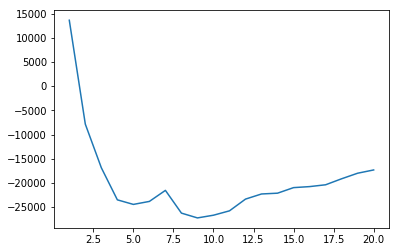

In [14]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 21, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(x).aic(x) for model in models]
plt.plot(n_components, aics);

In [19]:
components = np.argmin(aics) + 1

In [21]:
gmm = GaussianMixture(components, covariance_type='full', random_state=0)
gmm.fit(x)
print(gmm.converged_)

True


In [25]:
probs = gmm.predict_proba(x[:1])
probs

array([[0., 0., 0., 0., 0., 0., 1., 0., 0.]])